<a href="https://colab.research.google.com/github/vochicong/ai-memo/blob/master/learn_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 線形関数を学習

学習対象は、Celsius から Fahrenheit へ変換する関数

$$ f = c \times 1.8 + 32 $$

まず TensorFlow/Keras でやります。
そのうちに、Chainer や PyTorch でのやり方と比較したいです。

## 学習データ

array([-36, -28, -22, -12, -11,  -2,   2,  20,  22,  30])

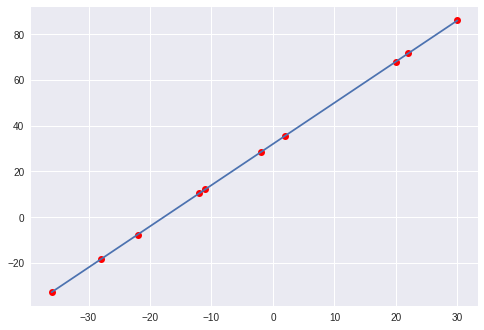

In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np

def celsius_to_fahrenheith(c):
    f = 1.8 * c + 32
    return f

def gen_data(n_samples=10, max_abs_value=40):
    inputs = np.random.randint(-max_abs_value, max_abs_value, n_samples)
    inputs = np.unique(inputs)
    inputs.sort()
    targets = list(map(celsius_to_fahrenheith, inputs))
    return inputs, np.array(targets)

def plot_loss(loss):
    plt.xlabel('Epoch')
    plt.ylabel('Loss Log')
    plt.yscale('log')
    plt.plot(loss)
    return

def plot_xy(xinputs, ytargets, ypredicts=None):
    if ypredicts is None:
        ypredicts = ytargets
    plt.plot(xinputs, ytargets, 'ro',
             xinputs, ypredicts)

xinputs, ytargets = gen_data(10)
plot_xy(xinputs, ytargets)
xinputs

## Keras/TensorFlow

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Weights: [array([[1.7998285]], dtype=float32), array([31.978659], dtype=float32)]
Loss: 0.0004528809804469347


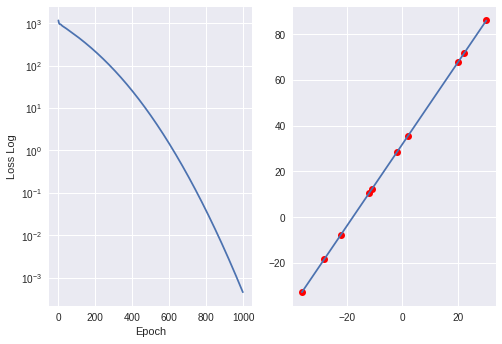

In [2]:
class MyTensorFlow:
    def __init__(self, inputs, targets):
        self.xinputs = inputs
        self.ytargets = targets
        
    def plot(self):
        plt.subplot(121)
        plot_loss(self.history.history['loss'])

        plt.subplot(122)
        plot_xy(self.xinputs, self.ytargets, self.ypredicts)
        return

    def model_fit(self, epochs=300):
        dense = keras.layers.Dense(units=1, input_shape=[1])
        self.model = keras.Sequential([dense])
        self.model.compile(loss=keras.losses.mean_squared_error, 
                      optimizer=keras.optimizers.Adam(.1))
        self.history = self.model.fit(self.xinputs, self.ytargets, 
                                      epochs=epochs, verbose=0)
        self.ypredicts = self.model.predict(self.xinputs)

        print('Weights: {}'.format(dense.get_weights()))
        print('Loss: {}'.format(self.history.history['loss'][-1]))
        return self


mytf = MyTensorFlow(xinputs, ytargets).model_fit(1000)
mytf.plot()

## PyTorch

びっくりしたことに、Colab に PyTorch がプリインストールされている！

In [3]:
!pip install -U torch
import torch
import torch.nn as nn
print(torch.__version__)

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.0.1.post2)
1.0.1.post2


Weights: Parameter containing:
tensor([[1.7999]], requires_grad=True), Parameter containing:
tensor([31.9866], requires_grad=True)
Loss: 0.0001797033182810992


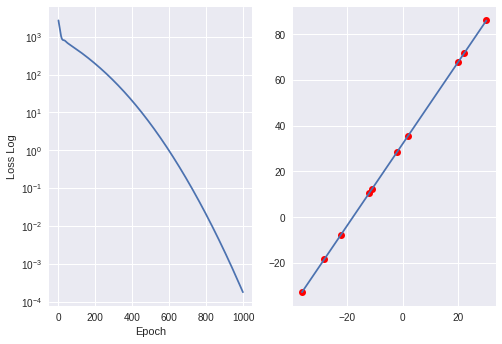

In [4]:
class MyTorch:
    def __init__(self, xinputs, ytargets):
        self.xinputs = torch.tensor(xinputs.reshape([-1,1]), dtype=torch.float32)
        self.ytargets = torch.tensor(ytargets.reshape([-1,1]), dtype=torch.float32)
        
    def plot(self):
        plt.subplot(121)
        plot_loss(self.loss_history)

        plt.subplot(122)
        plot_xy(self.xinputs.numpy(), self.ytargets.numpy(), 
                self.ypredicts.data.numpy())
        return

    def model_fit(self, epochs=300):
        self.model = nn.Linear(1, 1)
        loss = nn.MSELoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=.1)
        self.loss_history = []
        
        for epoch in range(epochs):
            self.ypredicts = self.model(self.xinputs)
            diff = loss(self.ytargets, self.ypredicts)   
            optimizer.zero_grad()
            diff.backward()
            optimizer.step()
            self.loss_history.append(diff.item())
        print('Weights: {}, {}'.format(self.model.weight, self.model.bias))
        print('Loss: {}'.format(self.loss_history[-1]))                
        return self


mytorch = MyTorch(xinputs, ytargets).model_fit(1000)
mytorch.plot()